<a href="https://colab.research.google.com/github/mark-morelos/DS-Unit-1-Sprint-2-Statistics/blob/master/Copy_of_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# TODO - code!
## 1 - write a code
import numpy as np
import pandas as pd
from scipy import stats

In [5]:
# True positive rate
p_pos_drunk = 1
# Prior probability
p_drunk = .001
# False positive rate
p_pos_not_drunk = .08
# compliment of the prior
p_not_drunk = 1 - p_drunk

numerator = p_pos_drunk * p_drunk
denominator = (p_pos_drunk * p_drunk) + (p_pos_not_drunk * p_not_drunk)

final_probability = numerator/denominator
final_probability 
# There is 1.24% probability that a person is drunk after one positive breathalyzer test

0.012357884330202669

In [6]:
# probability that a person is drunk after 2 tests
# subsequent application

# True positive rate
p_pos_drunk = 1
# Prior probability
p_drunk = 0.012357884330202669
# False positive rate
p_pos_not_drunk = .08
# compliment of the prior
p_not_drunk = 1 - p_drunk

numerator = p_pos_drunk * p_drunk
denominator = (p_pos_drunk * p_drunk) + (p_pos_not_drunk * p_not_drunk)

posterior_probability = numerator/denominator
posterior_probability

# there is 13.53% probability that a person is drunk after 2 tests

0.13525210993291495

In [8]:
# Count of breathalyzer tests to get to 95% probability
# True positive rate
p_pos_drunk = 1
# Prior probability
p_drunk = 0.6615996951348605
# False positive rate
p_pos_not_drunk = .08
# compliment of the prior
p_not_drunk = 1 - p_drunk

numerator = p_pos_drunk * p_drunk
denominator = (p_pos_drunk * p_drunk) + (p_pos_not_drunk * p_not_drunk)

posterior_probability2 = numerator/denominator
posterior_probability2

# the test should be taken 8 times to get to 95% probability

0.9606895076105054

In [13]:
# 2 - Explore scipy.stats.bayes_mvs
# used the Titanic Data
# Load the data and check errors
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
column_headers = ['party', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution',
                  'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban',
                  'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending',
                  'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']
cong_votes = pd.read_csv(url, header=None, names=column_headers, na_values='?')
cong_votes.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
cong_votes = cong_votes.replace(({'y':1, 'n':0}))

In [15]:
imm_votes = cong_votes['immigration'].dropna()
imm_votes

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
429    1.0
430    1.0
431    1.0
432    0.0
434    1.0
Name: immigration, Length: 428, dtype: float64

In [0]:
def conf_int(data, confidence=0.95):
  mydata = np.array(data)
  mymean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1)/np.sqrt(n)
  margin = stderr*stats.t.ppf((1 + confidence)/2, n-1)
  return (mymean, mymean - margin, mymean + margin)

In [17]:
# frequentist approach

conf_int(imm_votes)

(0.5046728971962616, 0.4571155174657166, 0.5522302769268066)

In [18]:
# Bayesian approach

stats.bayes_mvs(imm_votes)

(Mean(statistic=0.5046728971962616, minmax=(0.4647880803031372, 0.544557714089386)),
 Variance(statistic=0.2517427157778999, minmax=(0.22468630431719758, 0.2814835574283424)),
 Std_dev(statistic=0.5014446353268732, minmax=(0.47401086940828435, 0.5305502402490667)))

In [23]:
# mean confidence interval
mean_CI, _, _ = stats.bayes_mvs(imm_votes, alpha=.95)
mean_CI

Mean(statistic=0.5046728971962616, minmax=(0.45711551746571655, 0.5522302769268067))

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


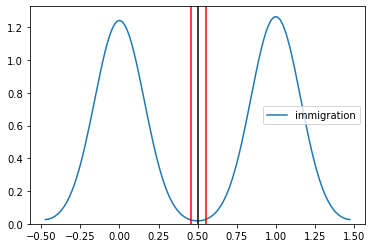

In [24]:
sns.kdeplot(imm_votes)
CI = conf_int(imm_votes)
plt.axvline(x=CI[1], color='red');
plt.axvline(x=CI[2], color='red');
plt.axvline(x=CI[0], color='black');

3 - summarize the difference between Bayesian and Frequentist statistics

Answer: Bayesian uses probability for both hypotheses and data, and requires to build a "prior data". Frequentist does not give the probability of the hypothesis and depends on the observed data.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!